In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset Fish to Python Environment

In [2]:
data = pd.read_csv("fish.csv")

In [3]:
data

,Type,C1,C2,C3,C4,C5,C6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


# Perform Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    85 non-null     object 
 1   C1      85 non-null     float64
 2   C2      85 non-null     float64
 3   C3      85 non-null     float64
 4   C4      85 non-null     float64
 5   C5      85 non-null     float64
 6   C6      85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [5]:
data.shape

(85, 7)

In [6]:
data.columns


Index(['Type', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6'], dtype='object')

In [7]:
data.describe()

,C1,C2,C3,C4,C5,C6
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,431.758824,27.338824,29.557647,33.120000,28.076471,12.865882
std,380.933962,11.289450,12.185045,13.197292,10.351543,2.117476
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.400000,21.000000,23.700000,16.900000,11.000000
50%,390.000000,28.400000,30.700000,35.000000,27.100000,13.700000
75%,650.000000,32.700000,36.000000,40.600000,39.200000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [8]:
data.isnull().sum()

Type    0
C1      0
C2      0
C3      0
C4      0
C5      0
C6      0
dtype: int64

In [9]:
data.nunique()

Type     4
C1      66
C2      72
C3      62
C4      72
C5      69
C6      45
dtype: int64

In [10]:
typ= data["Type"].value_counts()

In [11]:
typ

Bream    34
Roach    20
Pike     17
Smelt    14
Name: Type, dtype: int64

In [12]:
data["Type"] = data["Type"].map({"Bream" :"0","Roach":"1","Pike":"2","Smelt":"3"})

In [13]:
data


,Type,C1,C2,C3,C4,C5,C6
0,0,242.0,23.2,25.4,30.0,38.4,13.4
1,0,290.0,24.0,26.3,31.2,40.0,13.8
2,0,340.0,23.9,26.5,31.1,39.8,15.1
3,0,363.0,26.3,29.0,33.5,38.0,13.3
4,0,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,2,950.0,48.3,51.7,55.1,16.2,11.2
81,2,1250.0,52.0,56.0,59.7,17.9,11.7
82,2,1600.0,56.0,60.0,64.0,15.0,9.6
83,2,1550.0,56.0,60.0,64.0,15.0,9.6


# KMean Method - Elbow clustering


In [14]:
from sklearn.cluster import KMeans

In [15]:
X = data[['Type','C1','C2','C3',"C4","C5","C6"]]
X

,Type,C1,C2,C3,C4,C5,C6
0,0,242.0,23.2,25.4,30.0,38.4,13.4
1,0,290.0,24.0,26.3,31.2,40.0,13.8
2,0,340.0,23.9,26.5,31.1,39.8,15.1
3,0,363.0,26.3,29.0,33.5,38.0,13.3
4,0,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,2,950.0,48.3,51.7,55.1,16.2,11.2
81,2,1250.0,52.0,56.0,59.7,17.9,11.7
82,2,1600.0,56.0,60.0,64.0,15.0,9.6
83,2,1550.0,56.0,60.0,64.0,15.0,9.6


In [16]:
typ1= data["Type"].value_counts()
typ1

0    34
1    20
2    17
3    14
Name: Type, dtype: int64

In [17]:
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters = i,n_init=20)
    km.fit(X)
    css = km.inertia_
    print('Clusters =',i," wcss= ",css)
    wcss.append(css)

C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters = 1  wcss=  12236588.611764703


C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters = 2  wcss=  4415902.479384236


C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters = 3  wcss=  1923768.928069381


C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters = 4  wcss=  907348.2787777779


C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters = 5  wcss=  525891.4941952615


C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters = 6  wcss=  334659.0215562865


C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters = 7  wcss=  224454.9836904762


C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters = 8  wcss=  138421.64563492063


C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters = 9  wcss=  98004.57261111113


C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters = 10  wcss=  78900.72063492064


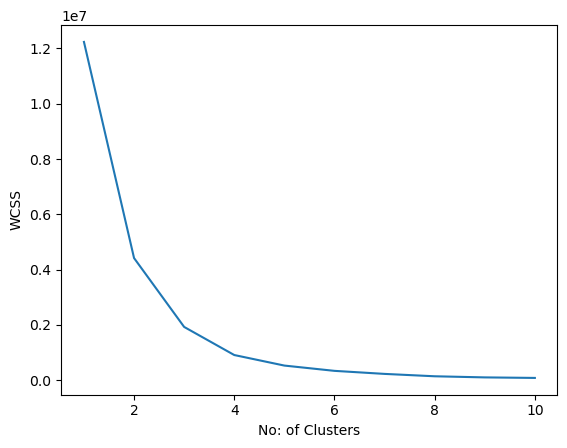

In [18]:
plt.plot(range(1,11),wcss)
plt.xlabel("No: of Clusters")
plt.ylabel("WCSS")
plt.show()

**From above the cluster for our data is 3**

In [19]:
km1 = KMeans(n_clusters=3,n_init=10)

In [20]:
cluster_labels = km1.fit_predict(X)

C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


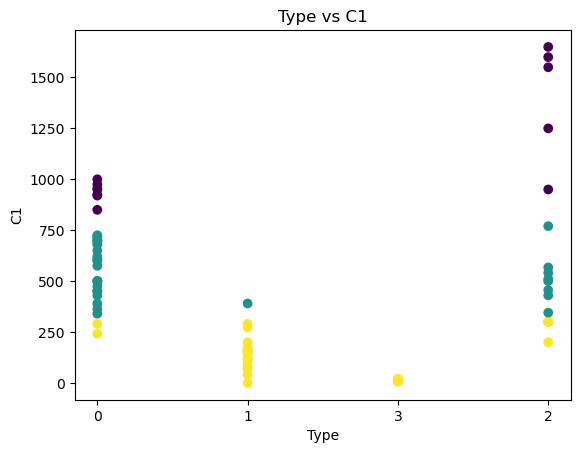

In [21]:
plt.scatter(X['Type'],X['C1'],c=cluster_labels)
plt.xlabel('Type')
plt.ylabel('C1')
plt.title('Type vs C1')
plt.show()

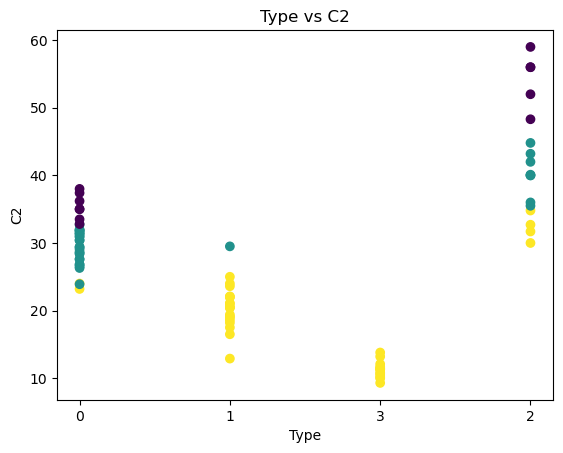

In [22]:
plt.scatter(X['Type'],X['C2'],c=cluster_labels)
plt.xlabel('Type')
plt.ylabel('C2')
plt.title('Type vs C2')
plt.show()

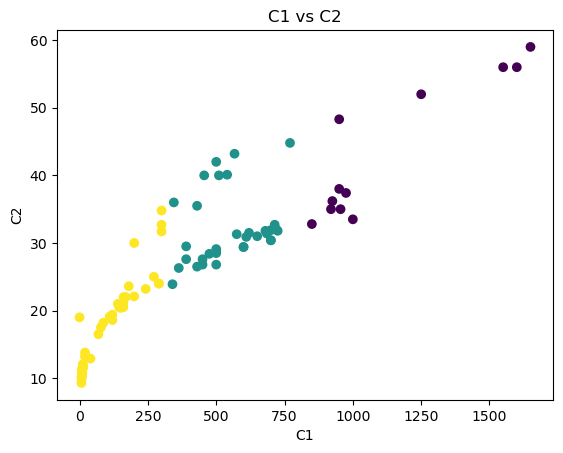

In [23]:
plt.scatter(X['C1'],X['C2'],c=cluster_labels)
plt.xlabel('C1')
plt.ylabel('C2')
plt.title('C1 vs C2')
plt.show()

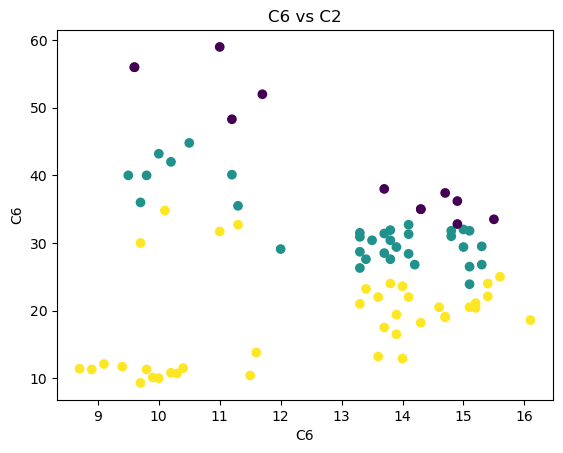

In [24]:
plt.scatter(X['C6'],X['C2'],c=cluster_labels)
plt.xlabel('C6')
plt.ylabel('C6')
plt.title('C6 vs C2')
plt.show()

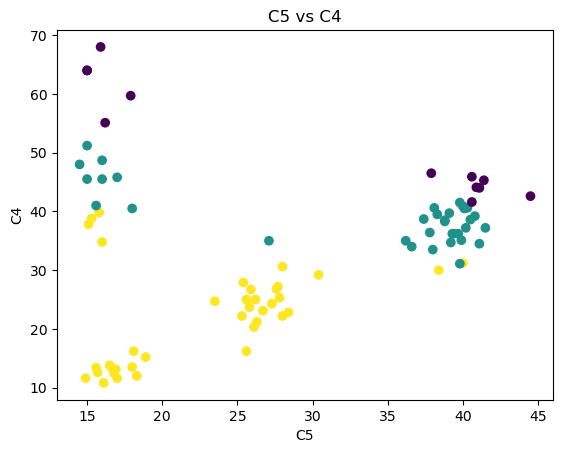

In [25]:
plt.scatter(X['C5'],X['C4'],c=cluster_labels)
plt.xlabel('C5')
plt.ylabel('C4')
plt.title('C5 vs C4')
plt.show()